In [313]:
url='https://drive.google.com/uc?id=1jqcEqjWDTCSOjIYRVTLNWkUHkVsJca6O'

In [314]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(url)

### Заполняем пустые ячейки

In [315]:
df.Cabin.fillna('W', inplace=True)

df.Embarked.fillna('C', inplace=True)

df.Age.interpolate(method='linear', inplace=True)

### Переводим в категориальные данные

[варианты перевода из категориальных данных](https://dfedorov.spb.ru/pandas/%D0%A0%D1%83%D0%BA%D0%BE%D0%B2%D0%BE%D0%B4%D1%81%D1%82%D0%B2%D0%BE%20%D0%BF%D0%BE%20%D0%BA%D0%BE%D0%B4%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D1%8E%20%D0%BA%D0%B0%D1%82%D0%B5%D0%B3%D0%BE%D1%80%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D1%85%20%D0%B7%D0%BD%D0%B0%D1%87%D0%B5%D0%BD%D0%B8%D0%B9%20%D0%B2%20Python.html?ysclid=lklbdrdfii975534987)

в категориальные данные будем переводить 'Sex', 'Embarked' и 'Cabin'


In [316]:
# Выбираем подход к кодированию категориальных значений, который заключается в использовании метода, называемого кодированием меток (label encoding).
# преобразуем столбецы ('object') в категорию, а затем используем эти значения категории для кодирования метки:
df_copy = df.copy()
# проверяем типы данных до
df_copy.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [317]:
df_copy["Embarked"] = df_copy["Embarked"].astype('category')
df_copy["Cabin"] = df_copy["Cabin"].astype('category')
df_copy["Sex"] = df_copy["Sex"].astype('category')
# проверяем типы данных после
df_copy.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin          category
Embarked       category
dtype: object

In [318]:
# Затем назначим закодированную переменную столбцу с помощью метода доступа (accessor) cat.codes
# до
df_copy

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,W,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,W,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,W,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,W,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.5,1,2,W./C. 6607,23.4500,W,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [319]:
# после
df_copy.Embarked = df_copy.Embarked.cat.codes
df_copy.Sex = df_copy.Sex.cat.codes
df_copy.Cabin = df_copy.Cabin.cat.codes
df_copy.drop(labels = ['Name', 'Ticket'], axis=1, inplace=True) # Удаляем неважные столбцы
df_copy # dataframe c числовыми значениями

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,7.2500,147,2
1,2,1,1,0,38.0,1,0,71.2833,81,0
2,3,1,3,0,26.0,0,0,7.9250,147,2
3,4,1,1,0,35.0,1,0,53.1000,55,2
4,5,0,3,1,35.0,0,0,8.0500,147,2
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,147,2
887,888,1,1,0,19.0,0,0,30.0000,30,2
888,889,0,3,0,22.5,1,2,23.4500,147,2
889,890,1,1,1,26.0,0,0,30.0000,60,0


### Визуализация 'Pclass' vs 'Survived'

Text(0.5, 1.0, 'Число выживших и погибших в зависимости от класса обслуживания')

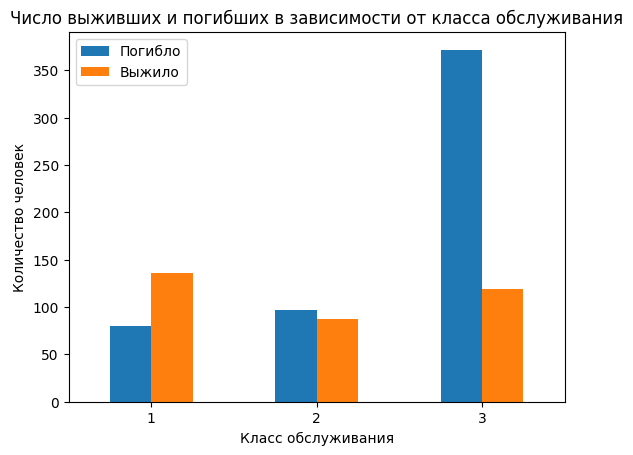

In [320]:
df.groupby(['Pclass', 'Survived']).size().to_frame().unstack().plot(kind='bar', rot=0)
plt.legend(['Погибло', 'Выжило'])
plt.ylabel('Количество человек')
plt.xlabel('Класс обслуживания')
plt.title('Число выживших и погибших в зависимости от класса обслуживания')

Text(0, 0.5, 'Процент выживших')

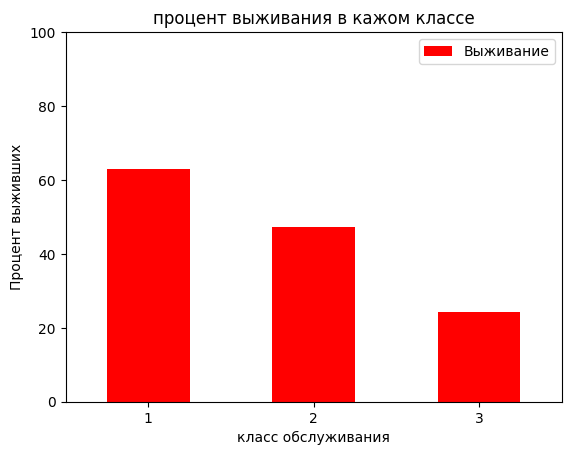

In [321]:
tr = df[['Pclass', 'Survived']].groupby('Pclass', as_index = False).mean()
tr.loc[:, 'Survived'] *=100
tr.plot.bar(x='Pclass', y = 'Survived', rot=0, label="Выживание", color='r')
plt.ylim(0, 100)
plt.title('процент выживания в кажом классе')
plt.xlabel('класс обслуживания')
plt.ylabel('Процент выживших')

# Наглядно видно как с уменьшением класса обслуживания падает процент выживших

### Визуализация 'Sex' vs 'Survived'

Text(0.5, 1.0, 'Число выживших и погибших в зависимости от пола')

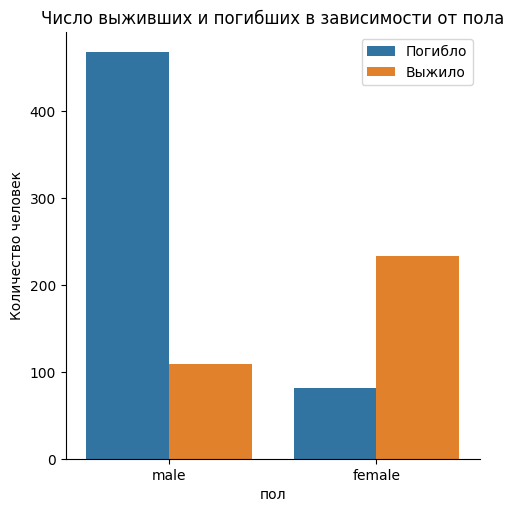

In [322]:
sns.catplot(data = df,hue = 'Survived', x = 'Sex',
            kind='count', legend=False)
plt.legend(['Погибло', 'Выжило'])
plt.ylabel('Количество человек')
plt.xlabel('пол')
plt.title('Число выживших и погибших в зависимости от пола')



### Визуализация 'Age' vs 'Survived'

<ipython-input-323-592c7701d980>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['Age_range']= pd.cut(df_age.Age, [0, 10, 20, 30, 40, 50, 80]) # создаем столбец и приписываем диапазон возраста


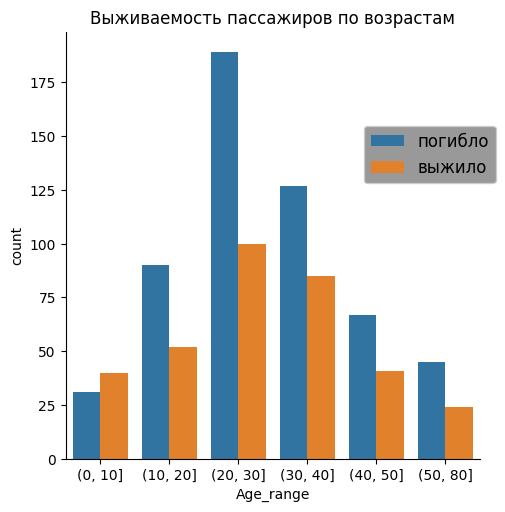

In [323]:
df_age = df[['Age','Survived']] # делаем отдельные столбцы
df_age['Age_range']= pd.cut(df_age.Age, [0, 10, 20, 30, 40, 50, 80]) # создаем столбец и приписываем диапазон возраста
sns.catplot(data=df_age, kind='count', hue = 'Survived', x = 'Age_range', legend=False)
plt.title('Выживаемость пассажиров по возрастам')
plt.legend(['погибло', 'выжило'], fontsize=12, facecolor='gray',bbox_to_anchor= (0.7, 0.8))

### Визуализация 'Sibsp' vs 'Survived'

Text(0.5, 9.444444444444438, 'Количество братьев, сестёр или супругов')

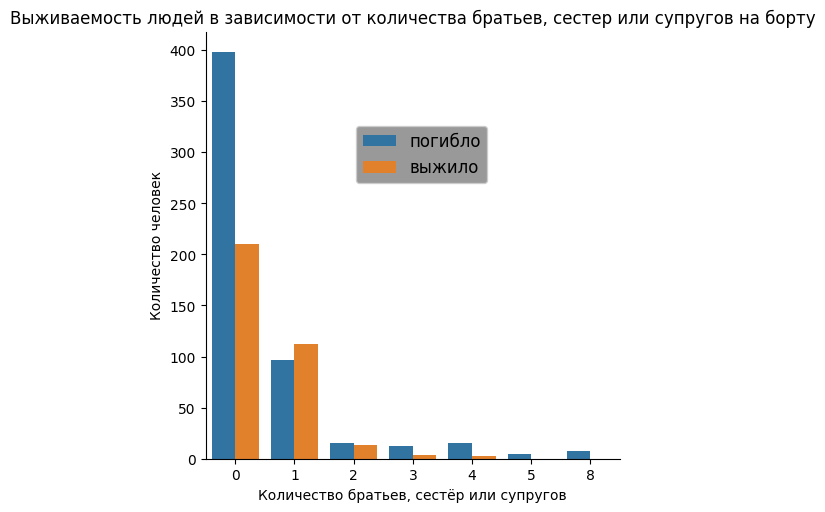

In [324]:
sns.catplot(x='SibSp', kind='count', hue='Survived', data=df, legend=False)
plt.title('Выживаемость людей в зависимости от количества братьев, сестер или супругов на борту')
plt.legend(['погибло', 'выжило'], fontsize=12, facecolor='gray',bbox_to_anchor= (0.7, 0.8))
plt.ylabel('Количество человек')
plt.xlabel('Количество братьев, сестёр или супругов')

### Визуализация 'Parch' vs 'Survived'

Text(0.5, 9.444444444444438, 'Количество родителей детей')

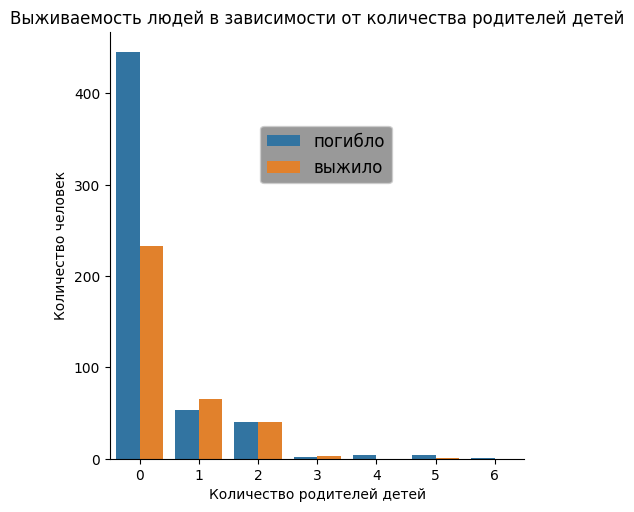

In [325]:
sns.catplot(x='Parch', kind='count', hue='Survived', data=df, legend=False)
plt.title('Выживаемость людей в зависимости от количества родителей детей')
plt.legend(['погибло', 'выжило'], fontsize=12, facecolor='gray',bbox_to_anchor= (0.7, 0.8))
plt.ylabel('Количество человек')
plt.xlabel('Количество родителей детей')

### Визуализация 'Fare' vs 'Survived'

<ipython-input-326-bedfc67d0f7e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fare['Fare_range']=pd.qcut(df_fare.Fare,8, precision=1)


Text(0.5, 9.444444444444438, 'Диапазон цен билетов')

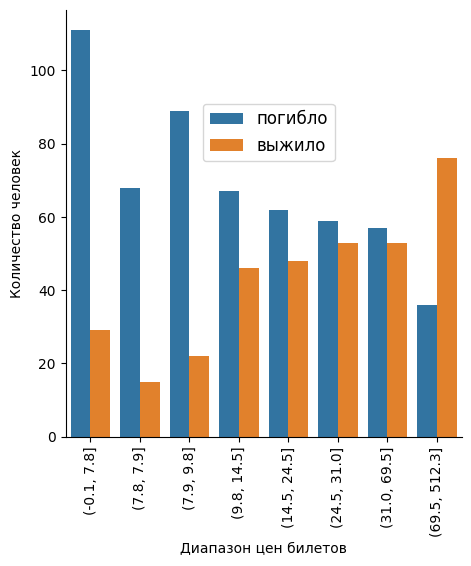

In [326]:
df_fare=df[['Fare', 'Survived']]
df_fare['Fare_range']=pd.qcut(df_fare.Fare,8, precision=1)
sns.catplot(data = df_fare,hue = 'Survived', x = 'Fare_range', kind='count', legend=False)
plt.xticks(rotation=90)
plt.legend(['погибло', 'выжило'], fontsize=12,bbox_to_anchor= (0.7, 0.8))
plt.ylabel('Количество человек')
plt.xlabel('Диапазон цен билетов')

### Визуализация 'Embarked' vs 'Survived'

Text(0.5, 0, 'порт посадки')

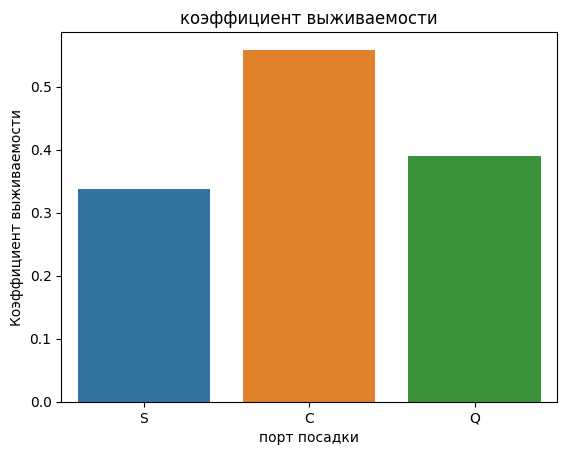

In [327]:
sns.barplot(x='Embarked', y ='Survived', data=df, errorbar=None)
plt.title('коэффициент выживаемости')
plt.ylabel('Коэффициент выживаемости')
plt.xlabel('порт посадки')